## introduction into jupyter/python
### or how to find a gift using simple data science techniques

# problem statement
our program leads Melanie, Timo and Alon have done a wonderful job on organizing this immersion programme. let's give them a present. as we all are data scientist from now on and and wanna do stuff in a data-driven fashion we also want to choose the presents in that  way. The presents we wanna give are a bottle of wine (red, white or rosé), some sweets (a chocolate candy, fancy marshmallows or cookies) and a CD (jazz, classic or pop). Now the task is to build a model on the participants based on human attributes (e.g. personality (introvert, extrovert), restaurant eater or self cooker, etc) and use this model to predict what the best for you and timo would be.
like that it makes sense to me.


# our solution
let's try building a predictive model 
* data collection

### learn a little pandas

In [1]:
import pandas as pd

In [84]:
# read in the data from the prepared excel sheet
data = pd.read_excel('data/wine_taste.xlsx')

In [67]:
data

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out
Daniel,white,hot,male,extrovert,in
Catherine,rose,hot,female,extrovert,out
Paula,rose,hot,female,introvert,out
Adrian,red,sweet,male,extrovert,in


In [23]:
# describe the data 
data.describe()

,Name,Label,Taste,Gender,Personality,eat_in_or_out
count,20,20,20,20,20,20
unique,20,3,4,2,2,2
top,Peter,white,sweet,male,extrovert,out
freq,1,9,7,14,11,10


In [69]:
data.Label.value_counts()

white    9
red      7
rose     4
Name: Label, dtype: int64

In [79]:
# curate wrong row 
data.loc['Jim','Label'] = 'white'

In [81]:
data = data.dropna()

In [82]:
data

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out
Daniel,white,hot,male,extrovert,in
Catherine,rose,hot,female,extrovert,out
Paula,rose,hot,female,introvert,out
Adrian,red,sweet,male,extrovert,in


In [37]:
# join data from other sheet
jobs = pd.read_excel('data/attributes.xlsx')

In [38]:
jobs.head()

,Name,Job,Size
0,Peter,medical doctor,170
1,Andreas,data scientist,182
2,James,preacher man,190
3,Jim,professor,188
4,John,post office officer,176


In [39]:
# set index to Name
jobs = jobs.set_index('Name')

In [40]:
jobs.head()

,Job,Size
Name,,
Peter,medical doctor,170
Andreas,data scientist,182
James,preacher man,190
Jim,professor,188
John,post office officer,176


In [41]:
# now join
joined = data.join(jobs)
joined.head()

,Label,Taste,Gender,Personality,eat_in_or_out,Job,Size
Name,,,,,,,
Peter,red,sweet,male,introvert,in,medical doctor,170
Andreas,white,spicy,male,extrovert,in,data scientist,182
James,red,sweet,male,extrovert,in,preacher man,190
Jim,white,spicy,male,introvert,out,professor,188
John,white,spicy,male,extrovert,out,post office officer,176


In [42]:
# rename a column
joined = joined.rename(columns = {'Size':'Bodysize'})
joined.head()

,Label,Taste,Gender,Personality,eat_in_or_out,Job,Bodysize
Name,,,,,,,
Peter,red,sweet,male,introvert,in,medical doctor,170
Andreas,white,spicy,male,extrovert,in,data scientist,182
James,red,sweet,male,extrovert,in,preacher man,190
Jim,white,spicy,male,introvert,out,professor,188
John,white,spicy,male,extrovert,out,post office officer,176


In [43]:
# write out dataframe as csv
joined.to_csv('data/joined_wine_and_jobs.tab', sep = '\t')

#### excercises 3 - interact with dataframes
1. display what persons are extroverts?
2. how many people prefer eating in restaurants?
3. how many people that like spicy food like red wine?
4. write out the dataframe as a semicolon separated flatfile and an excel file
5. convert dataframe to a dictionary using the dataframe method to dict
6. BONUS: filter for rows where the Index Name starts with an A


### visualization

In [44]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
# count
data.Taste.value_counts()

sweet    7
spicy    5
sour     4
hot      4
Name: Taste, dtype: int64

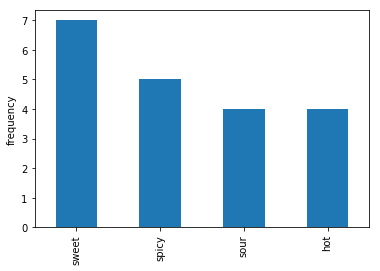

In [46]:
# simple barplot
data.Taste.value_counts().plot.bar()
plt.ylabel('frequency')

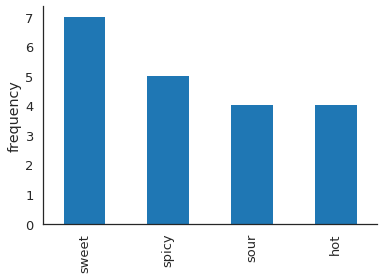

In [47]:
# slightly nicer settings
sns.set_context('talk')
sns.set_style('white')
data.Taste.value_counts().plot.bar()
plt.ylabel('frequency')
sns.despine()

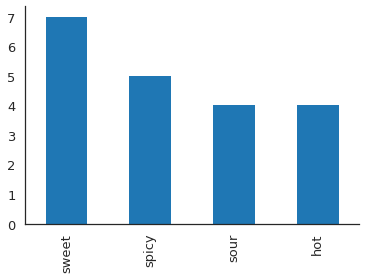

In [49]:
# slightly nicer settings and save the picture
sns.set_context('talk')
sns.set_style('white')
data.Taste.value_counts().plot.bar()
sns.despine()
plt.savefig('taste_frequency_plot.png', bbox_inches = 'tight')

In [50]:
data.head()

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out


In [51]:
joined.head()

,Label,Taste,Gender,Personality,eat_in_or_out,Job,Bodysize
Name,,,,,,,
Peter,red,sweet,male,introvert,in,medical doctor,170
Andreas,white,spicy,male,extrovert,in,data scientist,182
James,red,sweet,male,extrovert,in,preacher man,190
Jim,white,spicy,male,introvert,out,professor,188
John,white,spicy,male,extrovert,out,post office officer,176


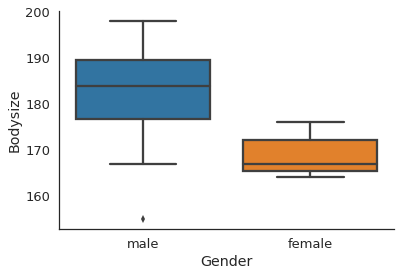

In [52]:
# generate a boxplot
sns.boxplot(data = joined, x= 'Gender', y='Bodysize')
sns.despine()

#### excercises 4 - generate some visualizations
1. generate a barplot for Personality frequencies
2. generate a boxplot for Taste vs Bodysize
3. change the colors of the boxplot
4. generate a histogram/density plot for Bodysize
5. BONUS: Put a swarmplot on top of boxplot

### let's train a model

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [54]:
test = data.sample(5)
train = data.loc[~data.index.isin(test.index),:]

In [55]:
test

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Ian,red,sour,male,introvert,in
Patricia,white,spicy,female,extrovert,out
Peter,red,sweet,male,introvert,in
Xavier,rose,spicy,male,extrovert,in
Georgina,rose,hot,male,introvert,out


In [56]:
train

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out
Daniel,white,hot,male,extrovert,in
Catherine,rose,hot,female,extrovert,out
Paula,rose,hot,female,introvert,out
Adrian,red,sweet,male,extrovert,in
Maria,red,sweet,female,extrovert,in


In [57]:
clf = RandomForestClassifier()

In [58]:
clf.fit(pd.get_dummies(train.drop('Label', axis = 1)),train.Label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [59]:
train_data = pd.get_dummies(train.drop('Label', axis = 1))

In [60]:
test_data = pd.get_dummies(test.drop('Label',axis = 1))

In [61]:
test_data = test_data.loc[:,train_data.columns.tolist()].fillna(0)

In [62]:
pred_labels = clf.predict(test_data)

In [63]:
pred_labels

array(['white', 'rose', 'white', 'white', 'white'], dtype=object)

In [64]:
ct = pd.crosstab(test.Label, pred_labels, rownames=['actual'], colnames=['preds'])

In [65]:
ct

preds,rose,white
actual,,
red,0,2
rose,0,2
white,1,0


In [66]:
accuracy_score(test.Label, pred_labels)

0.0